In [37]:
#import required libraries
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import glob
from termcolor import colored

In [46]:
# Load dataset of images and label
X = []
y = []
for img_path in glob.glob('/Users/furafuri/data science research/data/*.jpg'):
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_range = np.array([0, 50, 50])
    upper_range = np.array([20, 255, 255])
    mask = cv2.inRange(hsv, lower_range, upper_range)
    hist = cv2.calcHist([img], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    hist = hist.flatten()
    X.append(hist)
    if 'new' in img_path:
        y.append(0)  # New clothes label
    else:
        y.append(1)  # Second-hand clothes label
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train an SVM model on the full dataset
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)
# Predict labels for the testing set
y_pred = clf.predict(X_test)
# Calculate accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9090909090909091


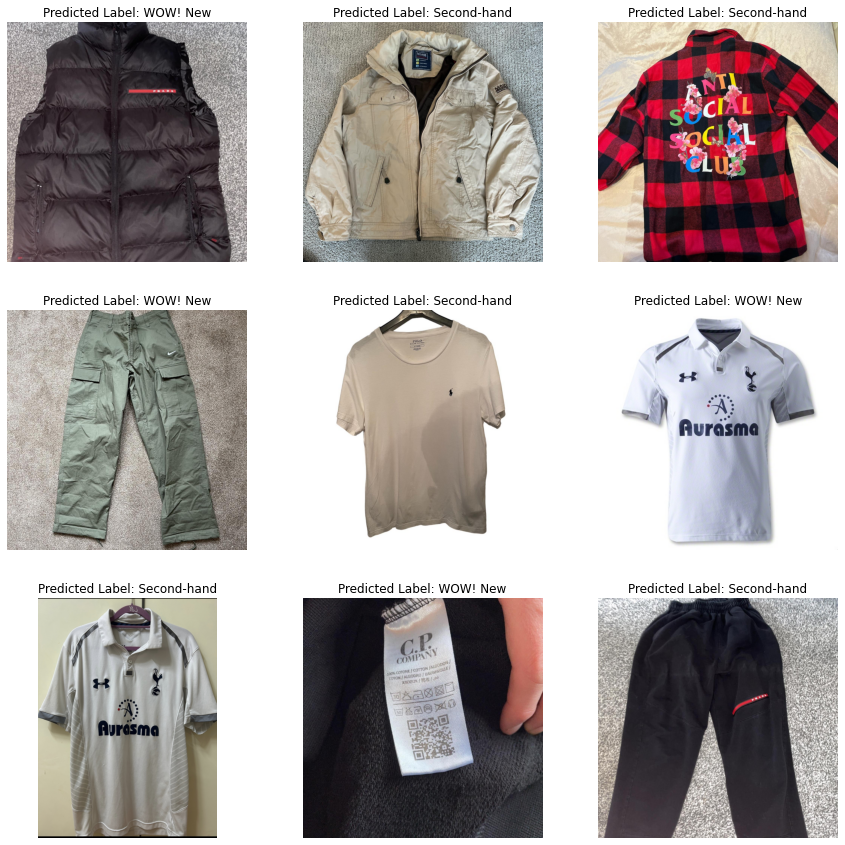

In [51]:
# Load a few images from the dataset and predict their labels
test_imgs = ['/Users/furafuri/data science research/ss.jpeg','/Users/furafuri/data science research/se.jpg','/Users/furafuri/data science research/used.jpg','/Users/furafuri/data science research/pp.jpg','/Users/furafuri/data science research/usd.jpeg','/Users/furafuri/data science research/data/new copy 2.jpg' ,'/Users/furafuri/data science research/data/secondhand copy 10.jpg','/Users/furafuri/data science research/s.jpeg','/Users/furafuri/data science research/ex.jpg']
predicted_labels = []
for img_path in test_imgs:
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_range = np.array([0, 50, 50])
    upper_range = np.array([20, 255, 255])
    mask = cv2.inRange(hsv, lower_range, upper_range)
    hist = cv2.calcHist([img], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    hist = hist.flatten()
    label = clf.predict([hist])[0]
    if label == 0:
        label_text = 'WOW! New'
     
      
    else:
        label_text = 'Second-hand'
    predicted_labels.append(label_text)

    
   
# Display the predicted labels and images using Matplotlib
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, img_path in enumerate(test_imgs):
    row = i // 3
    col = i % 3
    img = cv2.imread(img_path)
    axs[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f"Predicted Label: {predicted_labels[i]}")
    axs[row, col].axis('off')
plt.show()
